# 과거를 기억하는 신경망 : RNN #

### **순차데이터란?** ###

: 순서에 의미가 있으며, 순서가 달라질 경우 의미가 손상되는 데이터 

**에시**
1. 음성 및 오디어 데이터
2. 자연어
3. 생물학적 서열 데이터
4. 비디오 데이터 

### **RNN의 구조와 원리** ###

: 순환하는 구조를 가진, 순차 데이터 처리에 특화된 인공 신경망

**이것만 알면 RNN 마스터**

1. **시퀀스 데이터**를 입력받아 **순서 정보를 유지**하며 처리한다.
2. 순환하는 **은닉층**이 매 시점의 **은닉 상태**를 업데이트한다.
3. 이전 시점의 값을 현재 시점으로 넘겨준다.

### **RNN의 핵심 원리: 가중치 공유** ###

- **동일한 가중치**를 시퀀스의 다양한 시점에서 **반복**적으로 적용
- RNN이 시퀀스 데이터의 **길이와 시점 위치에 상관없이** 효과적으로 작동하게 하는 핵심 원리

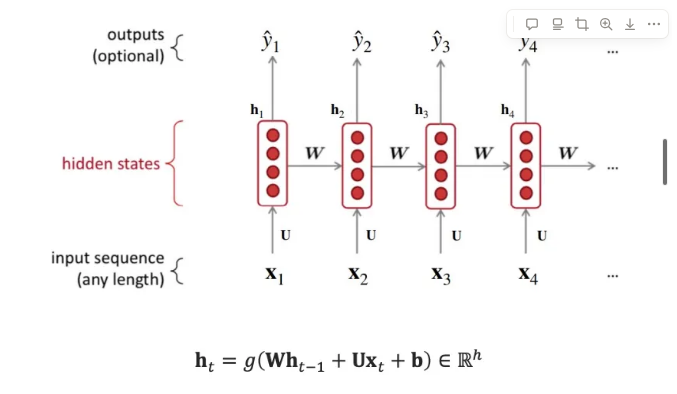

$X_1$을 처리할 때, $X_2$를 처리할 때, 그리고 $X_n$을 처리할 때까지 모두 동일한 파라미터(입력 가중치(U), 순환 가중치(W), 편향(b)) 를 공유하는 구조

 *그렇다면 가중치 공유의 이점은?*

- 학습 파라미터의 수 감소(가중치 공유를 통해 RNN은 입력 시퀀스의 길이가 아무리 길어져도 학습해야 할 파라미터의 수가 일정하게 유지된다.)
- 일반화 능력 향상(훈련 데이터에 없던 새로운 길이의 시퀀스나 다양한 패턴에도 유연하게 대응 가능하다.)

### **RNN의 한계 및 장기 의존성 문제** ###

#### **RNN의 한계점** ####

(1) RNN 구조의 특성 상 전체 시퀀스를 모두 읽은 후 역전파가 이루어짐

(2) 기울기 소실 (Vanishing Gradients)

(3) 기울기 폭주 (Exploding Gradients)

(4) 느린 훈련 시간



-> 위의 문제들은 **장기의존성문제**라는 치명적인 문제로 이어짐

### **LSTM & GPU**

#### **LSTM** ####

: 앞의 정보가 뒤로 충분히 전달되지 못하는 RNN의 기울기 소실 문제를 해결하기 위한 모델 구조

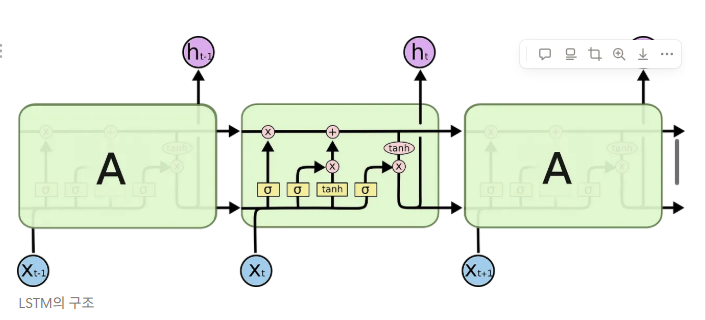

### 이것만 알면 LSTM 마스터

1. **핵심 아이디어**: **기억할 내용**과 **잊어버릴 내용**을 선택해서, **중요한 정보들을 오래** 가져간다.
    
    → “**GATE**”를 통해 곱셈을 덧셈으로 바꾼다.
    
2. **RNN과의 주요 차이:** $c_t\text{와}\space h_t$의 **2개의 순환되는 층**을 사용한다.(RNN에서는 $h_t$ 1개)
    - $c_t$(cell state): 장기 기억
    - $h_t$(hidden state): 단기 기억
3. **Gate를 통해 필요한 정보들만 통과** 
    - Forget gate: 정보를 **얼마나 잊어**버릴지 결정
    - Input gate: 현재 정보를 **얼마나 사용**할지 결정
    - Output gate: 다음 층으로 **어떤 정보를 전달**할지 결정 (hidden state를 만듦)
4. **Final memory cell:** Input, forget gate를 결합해 **현재 정보를 얼마나 기억할지 계산**

 **LSTM의 장점 & 단점**

**장점**: Vanishing gradient problem 효과적으로 완화 (≠해결)
<br>**단점**: 매우 복잡한 구조, RNN보다 학습 파라미터가 많아짐

#### **GRU** ####

: LSTM에서 조금 더 발전한 것으로 별도의 메모리 셀 없이 게이트 수를 줄여 구조를 간소화!

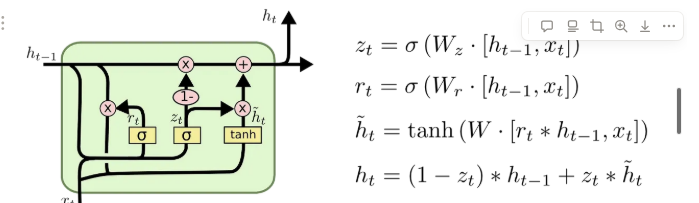

**LSTM과의 차이점**
- Forget gate와 input gate를 update gate 하나로 합침.
- Reset gate를 사용한다.
- Gate의 개수가 3개에서 2개로 줄어 학습 시간이 줄어듦

 **GRU의 장점 & 단점**

**장점**: 성능과 효율성 사이의 균형이 좋다
<br>**단점**: 긴 시퀀스 처리에서의 한계는 여전히 존재

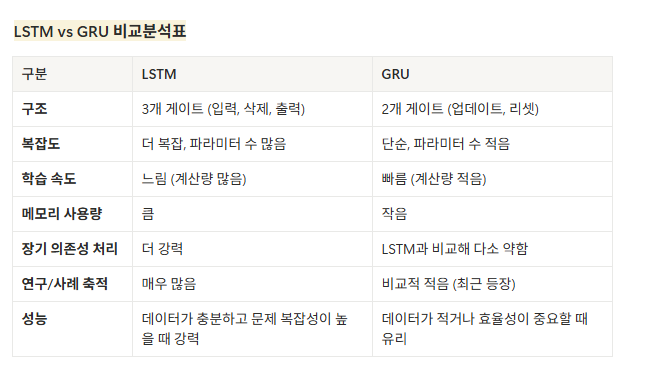

### **Seq2Seq** ###

특징

1. 아이템(단어)의 입력 개수와 출력 개수가 같지 않아도 된다.
2. 인코더와 디코더라는 모듈을 가지고 있어, Encoder-Decoder 모델이라고도 불린다. 

**인코더**: 입력된 시퀀스를 읽고 압축하여 디코더에게 넘겨줄 문맥 정보 준비 (원문의 특징 파악)

⇒ 여기서 압축된 정보는 **컨텍스트 벡터(context vector)**라고 한다. (요약 정보)

인코더에서는 **t 시점의 임베딩된 단어의 입력**과 **t-1 시점의 은닉 상태(hidden state)**가 RNN/LSTM의 입력으로 주어지며, 그 결과로 **t시점의 은닉 상태**가 나온다.

**디코더**: 압축된 정보를 바탕으로 원하는 시퀀스를 생성. (번역문 생성)

기본적인 seq2seq에서는, 인코더가 보내준 컨텍스트 벡터는 디코더의 **첫번째 은닉 상태**에 사용된다.

t시점에 나온 출력값이 그 다음 시점의 입력값으로 넘어간다.

### **말하는 애, 인코더 = 짱구**

- 짱구가 입력 문장(Sequence)을 받아서 그 의미를 하나의 핵심 요약으로 압축
- 짱구가 흰둥이에게 횡설수설 명령을 내림
    - **입력(Input Sequence):** 흰둥아~ 있잖아~ 그거~ 동그란 거~ 솜사탕
- 인코더는 이 5개의 단어를 순서대로 다 듣고 ‘솜사탕 장기자랑 시키기’라는 하나의 핵심 의도로 요약
    - 여기서 **핵심 의도 = 컨텍스트 벡터(context vector)**
        
        = 짱구가 흰둥이에게 넘겨주는 유일한 정보

### **듣고 행동하는 애, 디코더 = 흰둥이**

- 인코더가 압축한 컨텍스트 벡터(context vector)를 받아서, **새로운 문장이나 행동(Sequence)을 만들어냄
- 흰둥이는 짱구의 컨텍스트 벡터(context vector)를 전달
    - **출력(Output Sequence):** 몸을 던져서 → 데굴데굴 구르고 → 털을 부풀려서 → 뿅 하는 포즈를 잡기


**Seq2Seq의 핵심적 특징** 

- 입력과 출력의 길이가 달라도 된다
- 인코더와 디코더가 분리되어 있다
- 문맥 벡터라는 다리를 건넌다


 **Seq2Seq의 한계: 병목 현상 (Bottleneck)**


고정된 context vector에 소스 문장의 정보 압축
- 고정된 길이에 입력 시퀸스의 모든 정보를 담지 못하고 손실될 수 있다.
- 특히 긴 입력 시퀸스의 경우 정보 손실이 더 심각하며, 이는 모델 성능 하락으로 이어진다.